In [1]:
import sys
sys.path.append(r'/opt/local/bin/python2.7/')
sys.path.append(r'/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/SciServer-1.10.2-py3.6.egg')
sys.path.append(r'/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/')

In [2]:
#os.environ['PROJ_LIB'] = '<path_to_anaconda>/share/proj'

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
# from bokeh.plotting import figure, save

In [5]:
import rasterio

In [6]:
%matplotlib inline

# VIolent conflict 2010_2019 with coordinates

### Head

In [7]:
VC_data = pd.read_csv("VIolent conflict 2010_2019 with coordinates.csv")
VC_data.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,5663002,706,SOM29138,29138,27 July 2019,2019,1,Battles,Armed clash,Al Shabaab,...,Balad,2.3500,45.3833,1,Twitter,Other,27 July. Clashes occurred in Balad between AMI...,0,1564426183,SOM
1,5663003,706,SOM29139,29139,27 July 2019,2019,1,Battles,Armed clash,Military Forces of Somaliland (2010-),...,Karin Biyood,10.1499,46.1049,1,Twitter,Other,27 July. At least two soldiers were killed whe...,2,1564426183,SOM
2,5663004,706,SOM29140,29140,27 July 2019,2019,1,Violence against civilians,Attack,Al Shabaab,...,Saakow,1.6394,42.4522,1,Twitter,Other,27 July. Al Shabaab militants executed a man t...,1,1564426183,SOM
3,5662998,706,SOM29134,29134,26 July 2019,2019,1,Battles,Armed clash,Military Forces of Somalia (2017-) National In...,...,Marka,1.7131,44.7639,1,Shabelle Media Network,Subnational,26 July. Military soldiers clashed with forces...,10,1564426183,SOM
4,5662999,706,SOM29135,29135,26 July 2019,2019,1,Violence against civilians,Attack,Military Forces of Kenya (2013-),...,El Wak,2.7352,41.0177,3,Shabelle Media Network,Subnational,26 July. A truck driver heading from Somalia t...,0,1564426183,SOM


### Data COLs

In [8]:
VC_data.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

## Event in 2018 & 2019

In [9]:
event_18_19 = VC_data.loc[(VC_data.year==2019) | (VC_data.year==2018) , ['event_date',"event_type","location",
                                               "latitude","longitude",'geo_precision','fatalities']]

In [10]:
event_18_19.head()

,event_date,event_type,location,latitude,longitude,geo_precision,fatalities
0,27 July 2019,Battles,Balad,2.3500,45.3833,1,0
1,27 July 2019,Battles,Karin Biyood,10.1499,46.1049,1,2
2,27 July 2019,Violence against civilians,Saakow,1.6394,42.4522,1,1
3,26 July 2019,Battles,Marka,1.7131,44.7639,1,10
4,26 July 2019,Violence against civilians,El Wak,2.7352,41.0177,3,0


### Fatalities 

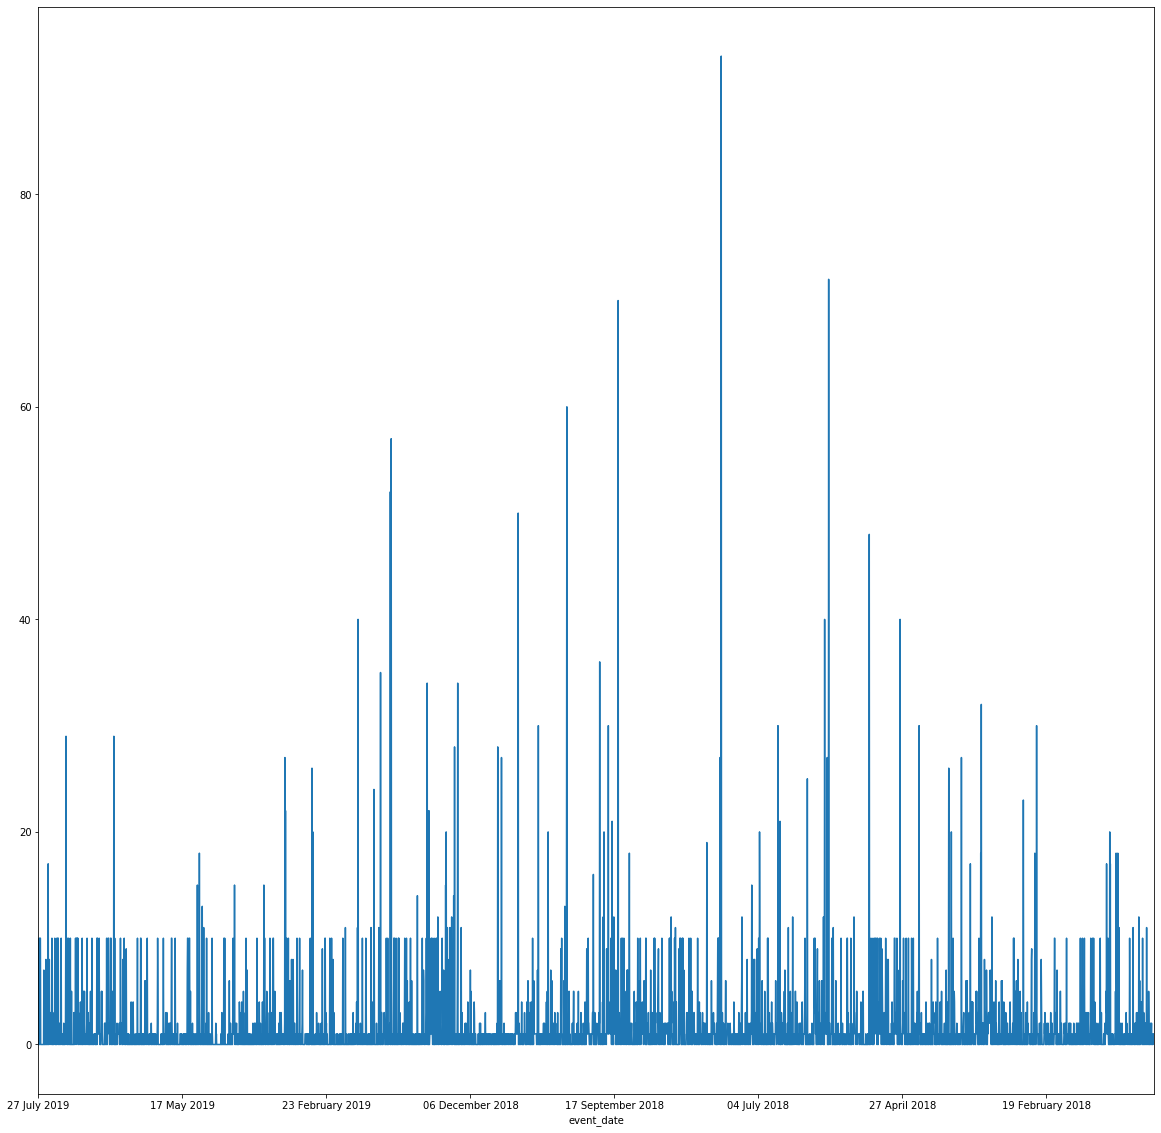

In [11]:
plt.figure(figsize=[20,20])
event_18_19.set_index('event_date')["fatalities"].plot()

### Event type & Count

Text(0.5, 1.0, 'Event Type & Counts')

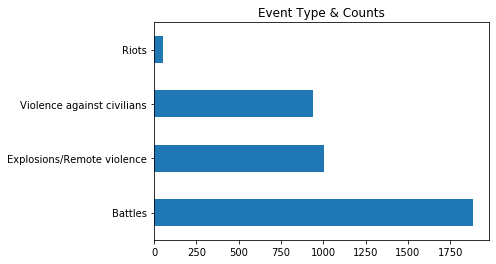

In [11]:
event_18_19["event_type"].value_counts(sort=True).plot.barh().set_title("Event Type & Counts")

### Maps

In [12]:
from shapely.geometry import Point, Polygon

In [40]:
crs = {"init":"epsg:4326"}

In [41]:
geometry = [Point(latlong) for latlong in zip(event_18_19["latitude"], event_18_19["longitude"])]

In [42]:
geometry[:5]

In [44]:
geo_event_18_19 = gpd.GeoDataFrame(event_18_19, crs =crs, geometry=geometry)
geo_event_18_19.crs

{'init': 'epsg:4326'}

In [63]:
somalia_administrative = gpd.read_file(r"shp/SOM_admin_SHP/SOM.shp")

In [45]:
# somalia_administrative = gpd.read_file(r"shp/somalia_administrative/somalia_administrative.shp")
# somalia_water = gpd.read_file(r"shp/somalia_water/somalia_water.shp")
# somalia_highway = gpd.read_file(r"shp/somalia_highway/somalia_highway.shp")

In [64]:
# somalia_water.crs

In [65]:
# somalia_administrative.crs

In [78]:
# somalia_administrative.to_csv("somalia_administrative.csv")

In [72]:
somalia_administrative.crs = {'init': 'epsg:4326'}

somalia_administrative.crs

{'init': 'epsg:4326'}

In [73]:
geo_event_18_19.to_file("event_18_19.shp")

In [74]:
# somalia_administrative_gpd = gpd.GeoDataFrame(somalia_administrative, crs = crs, geometry = somalia_administrative['geometry'])


In [75]:
somalia_administrative.total_bounds

array([40.98863   , -1.66205287, 51.41303253, 11.98520279])

In [76]:
geo_event_18_19 = gpd.read_file(r"event_18_19.shp")
geo_event_18_19.total_bounds

array([-1.6375, 40.9935, 11.9666, 51.1123])

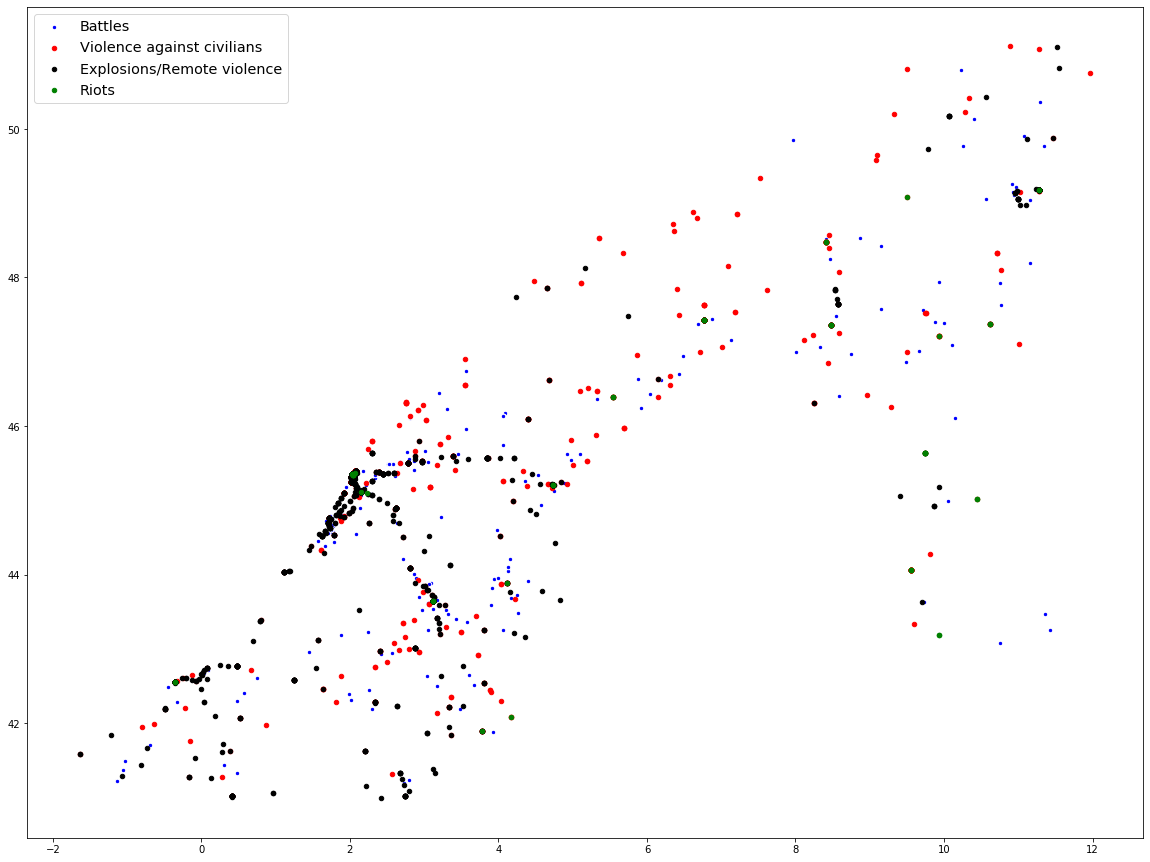

In [116]:
fig,ax = plt.subplots(figsize=[20,20])
# show(raster, ax=ax)
# somalia_administrative.plot(ax=ax, alpha=0.3, cmap="Dark2")#CMRmap_r
# somalia_highway.plot(ax=ax, alpha=0.3, color="black", label="Highway")
geo_event_18_19[geo_event_18_19.event_type=="Battles"].plot(ax = ax, markersize=20, c="blue", edgecolor='white', label="Battles")
geo_event_18_19[geo_event_18_19.event_type=="Violence against civilians"].plot(ax = ax, markersize=20, color="red", label="Violence against civilians")
geo_event_18_19[geo_event_18_19.event_type=="Explosions/Remote violence"].plot(ax = ax, markersize=20, color="black", label="Explosions/Remote violence")
geo_event_18_19[geo_event_18_19.event_type=="Riots"].plot(ax = ax, markersize=20, color="green", label="Riots")
plt.legend(loc = 2,fontsize="x-large")

# UNHCR-PRMN-Displacement-Dataset

In [196]:
UN_displacement = pd.read_excel("UNHCR-PRMN-Displacement-Dataset.xlsx", header=None)
UN_displacement.head()

,0,1,2,3,4,5,6,7,8
0,31/01/2016,201600,Banadir,Banadir,Hiraan,Belet Weyne,Conflict/Insecurity,Water,8
1,31/01/2016,201600,Bari,Qardho,Lower Shabelle,Qoryooley,Conflict/Insecurity,Livelihood Support,7
2,31/01/2016,201600,Bay,Baidoa,Bay,Baidoa,Drought related,Shelter,7
3,31/01/2016,201600,Bay,Baidoa,Bay,Qansax Dheere,Drought related,Shelter,4
4,31/01/2016,201600,Middle Juba,Saakow,Gedo,Baardheere,Drought related,Health,11


In [197]:
names = UN_displacement.tail(1)
names.values

array([['Month End', 'Year Week', 'Current (Arrival) Region',
        'Current (Arrival) District', 'Previous (Departure) Region',
        'Previous (Departure) District', 'Reason',
        'Current (Arrival) Priority Need', 'Number of Individuals']],
      dtype=object)

In [198]:
UN_displacement.columns = list(names.values)

In [199]:
UN_displacement.drop(UN_displacement.tail(1).index, inplace=True)

In [200]:
UN_displacement.head()

,Month End,Year Week,Current (Arrival) Region,Current (Arrival) District,Previous (Departure) Region,Previous (Departure) District,Reason,Current (Arrival) Priority Need,Number of Individuals
0,31/01/2016,201600,Banadir,Banadir,Hiraan,Belet Weyne,Conflict/Insecurity,Water,8
1,31/01/2016,201600,Bari,Qardho,Lower Shabelle,Qoryooley,Conflict/Insecurity,Livelihood Support,7
2,31/01/2016,201600,Bay,Baidoa,Bay,Baidoa,Drought related,Shelter,7
3,31/01/2016,201600,Bay,Baidoa,Bay,Qansax Dheere,Drought related,Shelter,4
4,31/01/2016,201600,Middle Juba,Saakow,Gedo,Baardheere,Drought related,Health,11


## Only 2018 & 2019

In [222]:
UN_displacement_18_19 = UN_displacement.loc[(UN_displacement.iloc[:,1].astype(str).str.contains('2019')) | UN_displacement.iloc[:,1].astype(str).str.contains("2018")]

In [223]:
UN_displacement_18_19.head()

,Month End,Year Week,Current (Arrival) Region,Current (Arrival) District,Previous (Departure) Region,Previous (Departure) District,Reason,Current (Arrival) Priority Need,Number of Individuals
12496,31/01/2018,201801,Awdal,Baki,Awdal,Lughaye,Drought related,Food,16
12497,31/01/2018,201801,Awdal,Borama,Awdal,Lughaye,Drought related,Shelter,8
12498,31/01/2018,201801,Awdal,Borama,Bakool,Waajid,Drought related,Transport,7
12499,31/01/2018,201801,Awdal,Borama,Banadir,Banadir,Drought related,Livelihood Support,8
12500,31/01/2018,201801,Awdal,Borama,Banadir,Banadir,Drought related,Transport,7


### Reasons for displacement:

Text(0.5, 1.0, 'Event Type & Counts')

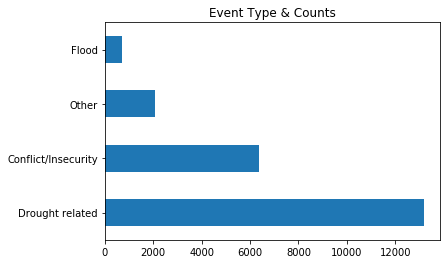

In [225]:
UN_displacement_18_19.iloc[:,6].value_counts().plot.barh().set_title("Event Type & Counts")

### Displacement from:

Text(0.5, 1.0, 'Departure Region')

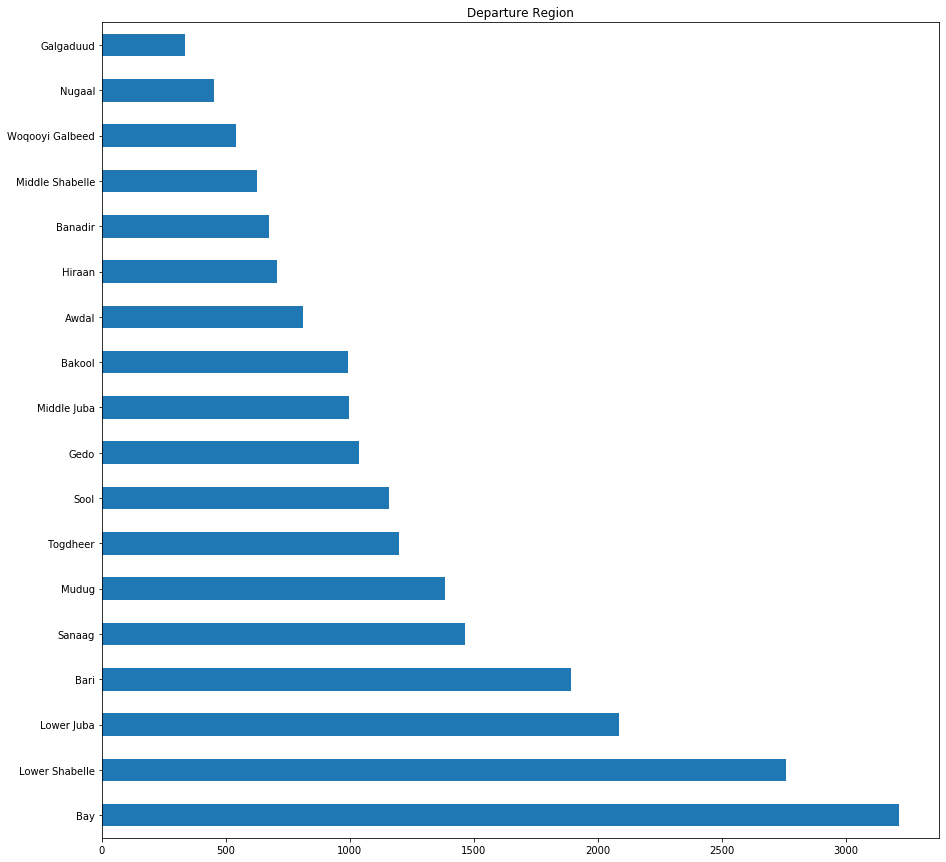

In [226]:
fig, ax = plt.subplots(figsize=[15,15])
UN_displacement_18_19.iloc[:,4].value_counts().plot.barh(ax=ax).set_title("Departure Region")

### Displacement to:

Text(0.5, 1.0, 'Current Arrival Region')

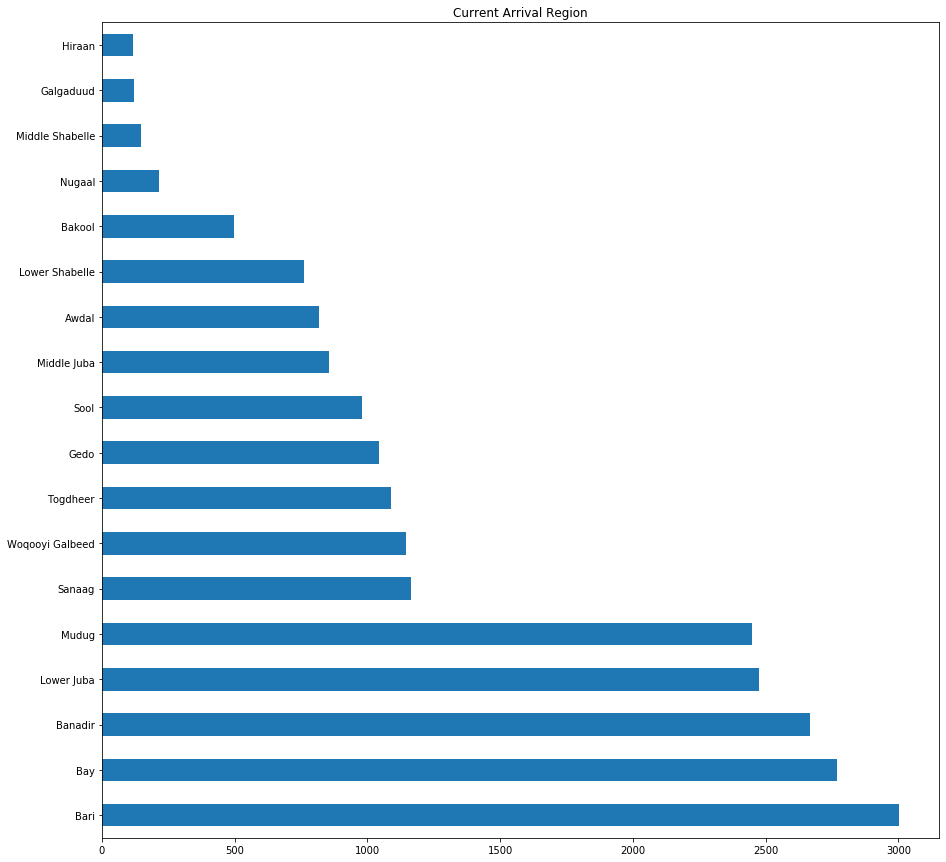

In [227]:
fig, ax = plt.subplots(figsize=[15,15])
UN_displacement_18_19.iloc[:,2].value_counts().plot.barh(ax=ax).set_title("Current Arrival Region")